# LABORATORIO #2 MACHINE LEARNING


Objetivos:
- MP3.zip: Entrenar y evaluar el algoritmo Naive Bayes en el dataset provisto, relacionados a comentarios de películas con connotación positiva y negativa. Asimismo, ajustar hiperparámetros para obtener una mejor predicción.

- Breast Cancer: Entrenar y evaluar los algoritmos de Machine Learning Naive Bayes, Linear Discrimination Analysis y Logistic Regression en el dataset Breast Cancer.

### Importar librerías

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import zipfile
import os
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,precision_score, classification_report, f1_score

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline



# I.- MP3.zip

### Importar zipfile

1. Carga y Preprocesamiento de Datos: considerando que tenemos textos en archivos .txt dentro de carpetas pos y neg, se crea una función que recorra estos archivos, lea los textos y asigne etiquetas.



In [ ]:
# Ruta al archivo ZIP
zip_file_path = 'PATH_FILE\\MP3_data.zip'

# Directorio de extracción
extraction_dir = 'PATH_FILE\\MP3_data_zip'

# Descomprimir el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# Directorio de entrenamiento y prueba
train_dir = os.path.join(extraction_dir, 'train')
dev_dir = os.path.join(extraction_dir, 'dev')


In [ ]:
# Directorio de entrenamiento y prueba
train_dir = os.path.join(extraction_dir, 'train')
dev_dir = os.path.join(extraction_dir, 'dev')

2. División de Datos: Se dividieron los datos en conjuntos de entrenamiento y prueba, esto permite entrenar y luego evaluar su rendimiento en un nuevo conjunto de datos.



In [ ]:
def load_comments_from_folder(folder_path):
    comments = []
    for sentiment in ['pos', 'neg']:
        sentiment_dir = os.path.join(folder_path, sentiment)
        for filename in os.listdir(sentiment_dir):
            file_path = os.path.join(sentiment_dir, filename)
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                comment = file.read()
                comments.append((comment, sentiment))
    return comments


In [ ]:
# Cargar comentarios de entrenamiento y prueba (dev)
train_comments = load_comments_from_folder(train_dir)
dev_comments = load_comments_from_folder(dev_dir)

3. Vectorización de Texto: antes de comenzar a entrenar el modelo Naive Bayes y considerando que existen archivos .txt, se realizó una vectorización para que los datos puedan ser procesados por el algoritmo de clasificación.



In [ ]:
# Preprocesamiento y Vectorización
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform([comment for comment, _ in train_comments])
y_train = [sentiment for _, sentiment in train_comments]
X_dev = vectorizer.transform([comment for comment, _ in dev_comments])
y_dev = [sentiment for _, sentiment in dev_comments]

4. Entrenamiento del Modelo: Permite que el modelo se ajuste, utilizando el conjunto de entrenamiento. Para este ejercicio, relacionado a clasificación de texto, se utilizó el algoritmo "Multinomial Naive Bayes", debido a que permite un manejo de datos discretos.


In [ ]:
# Entrenar clasificador Naive Bayes
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

5. Evaluación del Modelo: se evaluó el modelo utilizando las siguientes métricas en el conjunto de prueba:
- Accuracy
- Recall
- Precision
- F1 Score
- ROC AUC



In [ ]:
# Realizar predicciones en el conjunto de prueba
predictions = naive_bayes_classifier.predict(X_dev)

In [ ]:
# Calcular la precisión
accuracy = accuracy_score(y_dev, predictions)
print("Accuracy:", accuracy)

# Calcular la recuperación (recall)
recall = recall_score(y_dev, predictions, pos_label='pos')
print("Recall:", recall)

# Calcular la precisión
precision = precision_score(y_dev, predictions, pos_label='pos')
print("Precision:", precision)

# Calcular el puntaje F1
f1 = f1_score(y_dev, predictions, pos_label='pos')
print("F1 Score:", f1)

# Métrica ROC AUC
label_encoder = LabelEncoder()

# Convertir etiquetas a valores numéricos
y_dev_encoded = label_encoder.fit_transform(y_dev)
predictions_encoded = label_encoder.transform(predictions)

# Calcular puntaje ROC AUC
roc_auc = roc_auc_score(y_dev_encoded, predictions_encoded)
print("ROC AUC:", roc_auc)


Accuracy: 0.8948
Recall: 0.941
Precision: 0.9284657128761716
F1 Score: 0.934690836851254
ROC AUC: 0.8254999999999999


- Teniendo en cuenta, que el área bajo la curva ROC AUC proporciona una medida numérica del rendimiento global del modelo, por lo que mientras mayor sea el valor de esta métrica, mayor es su capacidad para discriminar entre las dos clases.
- El resultado ROC AUC obtenido para este modelo es de 0.825, indicando que el modelo tiene una buena capacidad para discriminar entre los comentarios positivos y negativos.

6. Ajuste de Hiperparámetros (Fine-tuning):
- A continuación se ajustaron los hiperparámetros del modelo Multinomial Naive Bayes y/o el proceso de vectorización para mejorar el rendimiento del modelo completo.
- Se utilizó el método GridSearch CV para encontrar los mejores hiperparámetros del modelo.

#### valores de hiperparámetros predifinidos:
- CountVectorizer()
    - max_features= None
    - max_df= 1.0
    - min_df= 1
    - ngram_range=(1,1)

- MultinomialNB()
    - alpha= 1.0  
    - fit_prior= True

In [ ]:


pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

parameters = {
    'vectorizer__max_features': (10000, 20000),
    'vectorizer__max_df': (0.5, 0.75, 1.0),
    'vectorizer__min_df': (1, 2, 3),
    'vectorizer__ngram_range': ((1, 1), (1, 2)),
    'classifier__alpha': (0.1, 1, 2),
    'classifier__fit_prior': (True, False),
}


grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)


grid_search.fit([comment for comment, _ in train_comments], [sentiment for _, sentiment in train_comments])


print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters set:
	classifier__alpha: 2
	classifier__fit_prior: True
	vectorizer__max_df: 0.5
	vectorizer__max_features: 20000
	vectorizer__min_df: 1
	vectorizer__ngram_range: (1, 2)


El conjunto de entrenamiento se divide nuevamente en varias partes más pequeñas llamadas "folds" o "pliegues". Por ejemplo, si se utiliza una validación cruzada con 5 pliegues (k-fold cross-validation), se dividirá en 5 partes iguales. Esto se hace para que puedas evaluar el rendimiento del modelo de manera más robusta y evitar problemas de sobreajuste o subajuste.

### Resultados de GridSearch CV obtenidos:

- Tiempo de procesamiento: 16 min 56.3s
- Cada una de las 216 posibles combinaciones de hiperparámetros, se dividieron en varias partes (folds), utilizando una validación cruzada que segmentó en 5 partes de igual tamaño, por lo tanto, se obtuvieron 1080 posibles resultados en este proceso. A continuación se presentan los resultados obtenidos con GridSearch CV:

	- classifier__alpha: 2
	- classifier__fit_prior: True
	- vectorizer__max_df: 0.5
	- vectorizer__max_features: 20000
	- vectorizer__min_df: 1
	- vectorizer__ngram_range: (1, 2)

## Reentrenamiento (post Finetuning)

### Preprocesamiento con hiperparámetros obtenidos de GridSearch CV

In [ ]:
vectorizer_2 = CountVectorizer(max_df=0.5,max_features=20000,min_df=1,ngram_range=(1,2))

In [ ]:
X_train_2 = vectorizer_2.fit_transform([comment for comment, _ in train_comments])
y_train_2 = [sentiment for _, sentiment in train_comments]
X_dev_2 = vectorizer_2.transform([comment for comment, _ in dev_comments])
y_dev_2 = [sentiment for _, sentiment in dev_comments]

### Entrenamiento Multinomial Naive Bayes (con hiperparámetros de GridSearch)

In [ ]:
# Entrenar clasificador Naive Bayes
naive_bayes_classifier_2 = MultinomialNB(alpha=2,fit_prior=True)
naive_bayes_classifier_2.fit(X_train_2, y_train_2)

MultinomialNB(alpha=2)

In [ ]:
# Realizar predicciones en el conjunto de prueba
predictions_2 = naive_bayes_classifier_2.predict(X_dev_2)

## Evaluar el modelo (optimizado)

In [ ]:
# Calcular la precisión
accuracy_2 = accuracy_score(y_dev_2, predictions_2)
print("Accuracy with fine_tuning:", accuracy_2)

# Calcular la recuperación (recall)
recall_2 = recall_score(y_dev_2, predictions_2, pos_label='pos')
print("Recall with fine_tuning:", recall_2)

# Calcular la precisión
precision_2 = precision_score(y_dev_2, predictions_2, pos_label='pos')
print("Precision with fine_tuning:", precision_2)

# Calcular el puntaje F1
f1_2 = f1_score(y_dev_2, predictions_2, pos_label='pos')
print("F1 Score with fine_tuning:", f1_2)

# ROC AUC
# Convertir etiquetas a valores numéricos
y_dev_encoded_2 = label_encoder.fit_transform(y_dev_2)
predictions_encoded_2 = label_encoder.transform(predictions_2)

# Calcular el área bajo la curva ROC AUC
roc_auc_2 = roc_auc_score(y_dev_encoded_2, predictions_encoded_2)
print("ROC AUC with fine_tuning:", roc_auc_2)

Accuracy with fine_tuning: 0.8788
Recall with fine_tuning: 0.89125
Precision with fine_tuning: 0.9542291220556746
F1 Score with fine_tuning: 0.921664943123061
ROC AUC with fine_tuning: 0.8601249999999999


### Tabla comparativa de evaluación del modelo Multinomial Naive Bayes antes y después del fine-tuning:

In [ ]:
evaluation = {
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score','ROC AUC'],
    'Before Fine-tuning': [accuracy, recall, precision, f1,roc_auc],
    'After Fine-tuning (Grid_Search)': [accuracy_2, recall_2, precision_2, f1_2,roc_auc_2]
}

evaluation_df = pd.DataFrame(evaluation)
print(evaluation_df)


      Metric  Before Fine-tuning  After Fine-tuning (Grid_Search)
0   Accuracy            0.894800                         0.878800
1     Recall            0.941000                         0.891250
2  Precision            0.928466                         0.954229
3   F1 Score            0.934691                         0.921665
4    ROC AUC            0.825500                         0.860125


### Análisis de los resultados:
- Accuracy (Exactitud): Ha disminuido después del fine-tuning, lo que quiere decir que el modelo ajustado predice un menor porcentaje de labels (positivos-negativos) correctamente en comparación con el modelo original.
- Recall (Sensibilidad): Ha disminuido después del ajuste. El modelo ajustado detecta un menor porcentaje de verdaderos positivos en comparación con el modelo original.
- Precision: La precisión ha aumentado con el ajuste. Lo que quiere decir, que el modelo ajustado predice un mayor porcentaje de positivos correctamente en comparación con el modelo original.
- F1 Score: Ha disminuido ligeramente después del fine-tuning.
- Área bajo la curva ROC AUC: Se obtuvo una mejora en esta métrica desde 0.82 a 0.86 con el ajuste de hiperparámetros, lo que quiere decir que el modelo logra determinar de mejor forma los comentarios positivos y negativos respecto al modelo anterior, ya que se aproxima a 1.

Finalmente, se puede decir que para este caso, la métrica más útil fue el ROC AUC, ya que para este caso se busca maximizar la discriminación entre ambas clases (comentarios positivos y negativos), por lo que el ajuste de hiperparámetros realizado contribuyó de mejor manera a su objetivo.

# II.- Breast Cancer

#### Ajustar los siguientes algoritmos a la base Breast Cancer y describir qué modelo realiza una mejor predicción.
- Naive Bayes
- Linear Discrimination Analysis (LDA)
- Logistic Regression

### Cargar el dataset Breast Cancer y convertirlo en Data Frame:

In [2]:
cancer=load_breast_cancer()

df_cancer=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
df_cancer['target']=cancer.target


In [3]:
df_cancer['target'].unique()

array([0, 1])

NOTA: Se definió como target 1: 'Benignos' y target 0: 'Malignos'

In [4]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Definiendo los features y target

In [7]:
X = df_cancer.drop(columns=['target'])
y=df_cancer['target']

### Escalando los features numéricos

In [8]:
minmax_scaler = MinMaxScaler()
X = minmax_scaler.fit_transform(X)

### Dividir el dataset en train y test:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.45, random_state=83)

## Algoritmo Naive Bayes:
- En este caso, se utilizó el modelo Gaussian Naive Bayes, el cual se utiliza en presencia de características o features de valores continuos.

In [10]:
model = GaussianNB()
model.fit(X_train, y_train);

In [11]:
# predicción
y_GaussianNB_train_data = model.predict(X_train)

Text(0.5, 1.0, 'Matriz de Confusión de y_train vs y_GaussianNB_train_data')

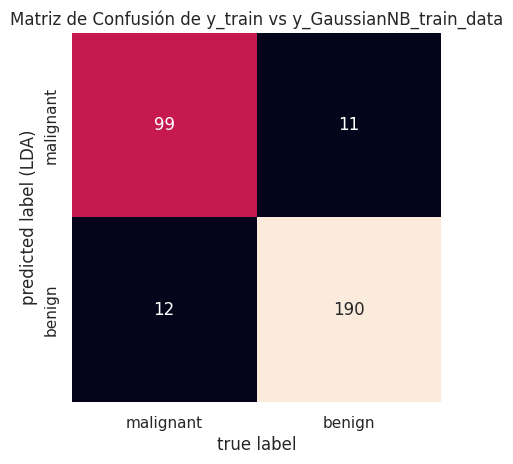

In [56]:
mat = confusion_matrix(y_train, y_GaussianNB_train_data)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=load_breast_cancer().target_names, yticklabels=load_breast_cancer().target_names)
plt.xlabel('true label')
plt.ylabel('predicted label (LDA)')
plt.title('Matriz de Confusión de y_train vs y_GaussianNB_train_data')

Según la matriz de confusión que se observa, relacionada a la data de entrenamiento, se identifican 12 registros de cancer maligno que han sido catalogados incorrectamente como benignos. Esta situación es particularmente preocupante, ya que estos diagnósticos erróneos podrían llevar a que los pacientes afectados no reciban tratamiento.

In [13]:
accuracy_train_NB=accuracy_score(y_train,y_GaussianNB_train_data )


In [54]:
recall_train_NB=recall_score(y_train,y_GaussianNB_train_data )
recall_train_NB

0.945273631840796

In [15]:
precision_train_NB=precision_score(y_train,y_GaussianNB_train_data )


In [16]:
f1_train_NB=f1_score(y_train,y_GaussianNB_train_data )

In [17]:
#Especificidad:
y_real = y_train
y_pred = y_GaussianNB_train_data

def specificity_score(y_true, y_pred):
    # Calcula la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_real, y_pred).ravel()

    # Calcula la especificidad
    specificity = tn / (tn + fp)

    return specificity


In [18]:

# Calcula la especificidad utilizando la función personalizada
specificity = specificity_score(y_real, y_pred)

print("Especificidad en el conjunto de datos de cáncer de mama:", specificity)


Especificidad en el conjunto de datos de cáncer de mama: 0.8918918918918919


In [19]:

# Supongamos que tienes tus etiquetas reales y predicciones
y_real = [0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
y_pred = [0, 1, 0, 0, 0, 1, 1, 0, 0, 0]

# Calcula la matriz de confusión
confusion = confusion_matrix(y_real, y_pred)

# Extrae los valores de la matriz de confusión
tn, fp, fn, tp = confusion.ravel()

# Calcula la especificidad
specificity = tn / (tn + fp)

print("Especificidad:", specificity)


Especificidad: 0.8333333333333334


In [20]:

y_GaussianNB_test_data  = model.predict(X_test)

Text(0.5, 1.0, 'Matriz de Confusión de y_test vs y_GaussianNB_test_data')

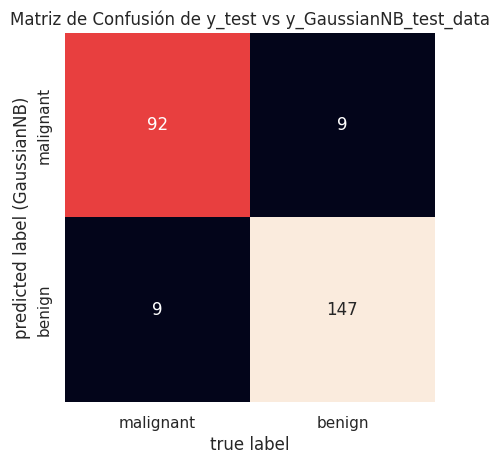

In [21]:
mat = confusion_matrix(y_test, y_GaussianNB_test_data)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=load_breast_cancer().target_names, yticklabels=load_breast_cancer().target_names)
plt.xlabel('true label')
plt.ylabel('predicted label (GaussianNB)')
plt.title('Matriz de Confusión de y_test vs y_GaussianNB_test_data')

Text(0.5, 1.0, 'Matriz de Confusión de y_test vs y_GaussianNB_test_data')

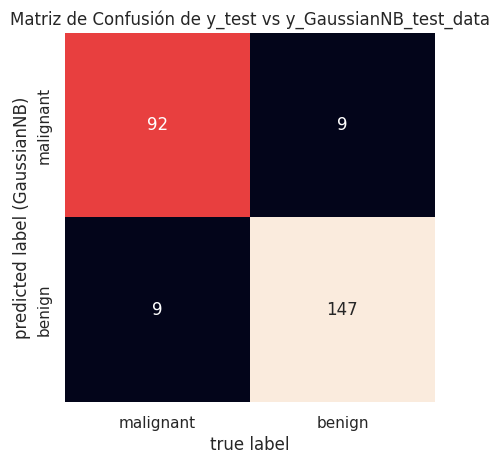

In [22]:
mat = confusion_matrix(y_test, y_GaussianNB_test_data)
sns.heatmap(mat,square=True, annot=True, fmt='d', cbar=False,
            xticklabels=load_breast_cancer().target_names, yticklabels=load_breast_cancer().target_names)
plt.xlabel('true label')
plt.ylabel('predicted label (GaussianNB)')
plt.title('Matriz de Confusión de y_test vs y_GaussianNB_test_data')

Según la matriz de confusión que se observa, relacionada a la data de testeo, se identifican 09 registros de cancer maligno que han sido catalogados incorrectamente como benignos. Al igual que el modelo sobre la data de entrenamiento, sigue siendo preocupante, ya que estos diagnósticos erróneos podrían llevar a que los pacientes afectados no reciban tratamiento.

In [23]:
model.predict_proba(X_test)[:5]


array([[1.00000000e+00, 4.07952121e-42],
       [1.00000000e+00, 7.02274363e-92],
       [1.37063606e-11, 1.00000000e+00],
       [5.60609480e-14, 1.00000000e+00],
       [2.40369636e-05, 9.99975963e-01]])

In [24]:
accuracy_test_NB=accuracy_score(y_test,y_GaussianNB_test_data)

In [25]:
recall_test_NB=recall_score(y_test,y_GaussianNB_test_data)

In [26]:
precision_test_NB=precision_score(y_test,y_GaussianNB_test_data)

In [27]:
f1_score_test_NB=f1_score(y_test,y_GaussianNB_test_data)

In [28]:
#Especificidad:
y_real = y_test
y_pred = y_GaussianNB_test_data

# Calcula la especificidad utilizando la función personalizada
specificity = specificity_score(y_real, y_pred)

print("Especificidad en el conjunto de datos de test de cáncer de mama:", specificity)

Especificidad en el conjunto de datos de test de cáncer de mama: 0.9108910891089109


In [29]:
# Tabla comparativa:
metrics = {
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'GaussianNaive Bayes (Training Data)': [accuracy_train_NB, recall_train_NB, precision_train_NB, f1_train_NB],
    'Gaussian Naive Bayes (Test Data)': [accuracy_test_NB, recall_test_NB, precision_test_NB, f1_score_test_NB]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

      Metric  GaussianNaive Bayes (Training Data)  \
0   Accuracy                             0.926282   
1     Recall                             0.945274   
2  Precision                             0.940594   
3   F1 Score                             0.942928   

   Gaussian Naive Bayes (Test Data)  
0                          0.929961  
1                          0.942308  
2                          0.942308  
3                          0.942308  


### Algoritmo Análisis de Discriminante (LDA)

In [30]:

model = LDA()
model.fit(X_train,y_train);



#### LDA en data de entrenamiento

In [31]:

y_LDA_train_data = model.predict(X_train)

### Matriz de Confusión y_train vs y_train_predicted (LDA)

Text(0.5, 1.0, 'Matriz de Confusión de y_train vs y_train_predicted LDA')

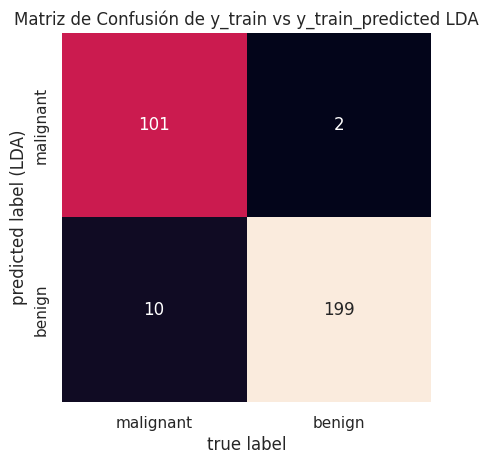

In [32]:
mat = confusion_matrix(y_train, y_LDA_train_data)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=load_breast_cancer().target_names, yticklabels=load_breast_cancer().target_names)
plt.xlabel('true label')
plt.ylabel('predicted label (LDA)')
plt.title('Matriz de Confusión de y_train vs y_train_predicted LDA')

Según la matriz de confusión que se observa, relacionada a la data de entrenamiento, se identifican 10 registros de cancer maligno que han sido catalogados incorrectamente como benignos. Esta predicción es preocupante, ya que estos diagnósticos erróneos podrían llevar a que los pacientes afectados no reciban tratamiento.

In [33]:
accuracy_train_LDA=accuracy_score(y_train,y_LDA_train_data)
recall_train_LDA=recall_score(y_train,y_LDA_train_data)
precision_train_LDA=precision_score(y_train,y_LDA_train_data)
f1_score_train_LDA=f1_score(y_train,y_LDA_train_data)

In [34]:
#Especificidad:
y_real = y_train
y_pred = y_LDA_train_data

# Calcula la especificidad utilizando la función personalizada
specificity = specificity_score(y_real, y_pred)

print("Especificidad en el conjunto de datos de entrenamiento de cáncer de mama:", specificity)

Especificidad en el conjunto de datos de entrenamiento de cáncer de mama: 0.9099099099099099


In [35]:
#Predecir los labels de clase con los datos de prueba (X_test)
y_LDA_test_data  = model.predict(X_test)

### Matriz de Confusión (y test vs y_test_predicted LDA)

Text(0.5, 1.0, 'Matriz de Confusión de y_test vs y_test_predicted LDA')

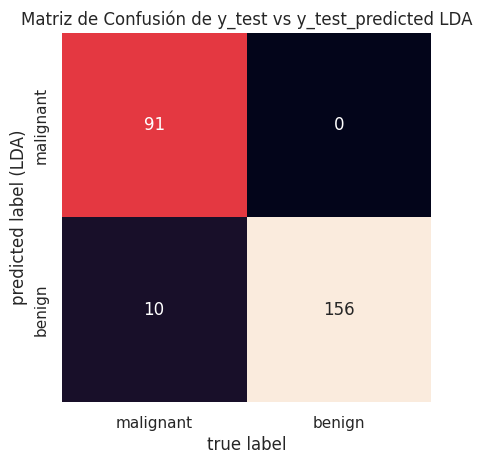

In [36]:
mat = confusion_matrix(y_test, y_LDA_test_data)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=load_breast_cancer().target_names, yticklabels=load_breast_cancer().target_names)
plt.xlabel('true label')
plt.ylabel('predicted label (LDA)')
plt.title('Matriz de Confusión de y_test vs y_test_predicted LDA')

Según la matriz de confusión que se observa, relacionada a la data de testeo, se identifican 10 registros de cancer maligno que han sido catalogados incorrectamente como benignos. Al igual que el modelo sobre la data de entrenamiento, sigue siendo preocupante, ya que estos diagnósticos erróneos podrían llevar a que los pacientes afectados no reciban tratamiento.

In [37]:
model.predict_proba(X_test)[:5]

array([[3.61748040e-02, 9.63825196e-01],
       [9.99998733e-01, 1.26707060e-06],
       [2.58355884e-05, 9.99974164e-01],
       [1.44292305e-08, 9.99999986e-01],
       [2.90477281e-03, 9.97095227e-01]])

In [38]:
accuracy_test_LDA=accuracy_score(y_test,y_LDA_test_data)
recall_test_LDA=recall_score(y_test,y_LDA_test_data)
precision_test_LDA=precision_score(y_test,y_LDA_test_data)
f1_score_test_LDA=f1_score(y_test,y_LDA_test_data)

In [39]:
#Especificidad:
y_real = y_test
y_pred = y_LDA_test_data

# Calcula la especificidad utilizando la función personalizada
specificity = specificity_score(y_real, y_pred)

print("Especificidad en el conjunto de datos de testeo de cáncer de mama:", specificity)

Especificidad en el conjunto de datos de testeo de cáncer de mama: 0.900990099009901


In [40]:
## Tabla comparativa (entrenamiento - test):

metrics = {
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'LDA (Training Data)': [accuracy_train_LDA, recall_train_LDA, precision_train_LDA, f1_score_train_LDA],
    'LDA (Test Data)': [accuracy_test_LDA, recall_test_LDA, precision_test_LDA, f1_score_test_LDA]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

      Metric  LDA (Training Data)  LDA (Test Data)
0   Accuracy             0.961538         0.961089
1     Recall             0.990050         1.000000
2  Precision             0.952153         0.939759
3   F1 Score             0.970732         0.968944


### Algoritmo Regresión Logística

In [41]:
#Inicializar el clasificador Regresión Logística y ajustarlo
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train);


In [42]:
# predicción con X_train
y_log_reg_train_data = model.predict(X_train)

Text(0.5, 1.0, 'Matriz de Confusión de y_train vs y_log_reg_train_data')

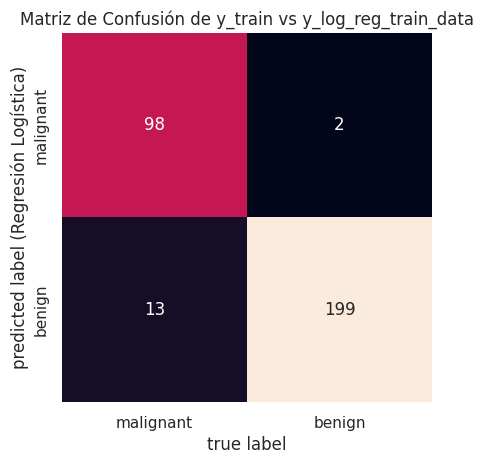

In [43]:
mat = confusion_matrix(y_train, y_log_reg_train_data)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=load_breast_cancer().target_names, yticklabels=load_breast_cancer().target_names)
plt.xlabel('true label')
plt.ylabel('predicted label (Regresión Logística)')
plt.title('Matriz de Confusión de y_train vs y_log_reg_train_data')

Según la matriz de confusión que se observa, relacionada a la data de entrenamiento, se identifican 13 registros de cancer maligno que han sido catalogados incorrectamente como benignos. Lo cual es preocupante, considerando las repercusiones relacionadas a diagnósticos erróneos que podrían llevar a que los pacientes afectados no reciban tratamiento.

In [44]:
accuracy_train_LR=accuracy_score(y_train,y_log_reg_train_data )
recall_train_LR=recall_score(y_train,y_log_reg_train_data  )
precision_train_LR=precision_score(y_train,y_log_reg_train_data )
f1_score_train_LR=f1_score(y_train,y_log_reg_train_data )

In [45]:
#Especificidad:
y_real = y_train
y_pred = y_log_reg_train_data

# Calcula la especificidad utilizando la función personalizada
specificity = specificity_score(y_real, y_pred)

print("Especificidad en el conjunto de datos de entrenamiento de cáncer de mama:", specificity)

Especificidad en el conjunto de datos de entrenamiento de cáncer de mama: 0.8828828828828829


In [46]:
#Predecir los labels de clase con los datos de prueba (X_test)
y_log_reg_test_data  = model.predict(X_test)

Text(0.5, 1.0, 'Matriz de Confusión de y_test vs y_log_reg_test_data')

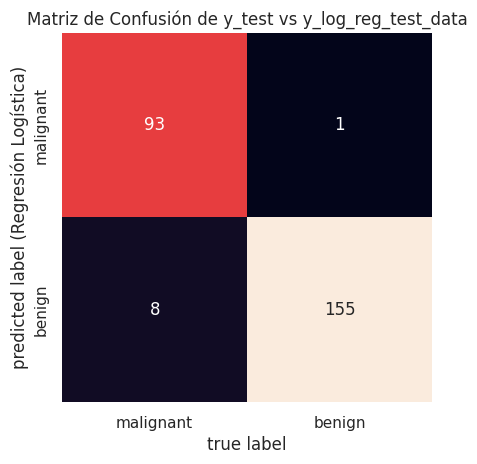

In [47]:
mat = confusion_matrix(y_test, y_log_reg_test_data)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=load_breast_cancer().target_names, yticklabels=load_breast_cancer().target_names)
plt.xlabel('true label')
plt.ylabel('predicted label (Regresión Logística)')
plt.title('Matriz de Confusión de y_test vs y_log_reg_test_data')

Según la matriz de confusión que se observa, relacionada a la data de testeo, se identifican 8 registros de cancer maligno que han sido catalogados incorrectamente como benignos. Al igual que el modelo sobre la data de entrenamiento, sigue siendo preocupante, ya que estos diagnósticos erróneos podrían llevar a que los pacientes afectados no reciban tratamiento.

In [48]:
model.predict_proba(X_test)[:5]

array([[0.89981335, 0.10018665],
       [0.97882403, 0.02117597],
       [0.03581913, 0.96418087],
       [0.00335289, 0.99664711],
       [0.275727  , 0.724273  ]])

In [49]:
accuracy_test_LR=accuracy_score(y_test,y_log_reg_test_data)
recall_test_LR=recall_score(y_test,y_log_reg_test_data)
precision_test_LR=precision_score(y_test,y_log_reg_test_data)
f1_score_test_LR=f1_score(y_test,y_log_reg_test_data)

In [50]:
#Especificidad:
y_real = y_test
y_pred = y_log_reg_test_data

# Calcula la especificidad utilizando la función personalizada
specificity = specificity_score(y_real, y_pred)

print("Especificidad en el conjunto de datos de testeo de cáncer de mama:", specificity)

Especificidad en el conjunto de datos de testeo de cáncer de mama: 0.9207920792079208


In [51]:
## Tabla comparativa (entrenamiento - test):

metrics = {
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Regresión Logística (Training Data)': [accuracy_train_LR, recall_train_LR, precision_train_LR, f1_score_train_LR],
    'Regresión Logística (Test Data)': [accuracy_test_LR, recall_test_LR, precision_test_LR, f1_score_test_LR]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

      Metric  Regresión Logística (Training Data)  \
0   Accuracy                             0.951923   
1     Recall                             0.990050   
2  Precision                             0.938679   
3   F1 Score                             0.963680   

   Regresión Logística (Test Data)  
0                         0.964981  
1                         0.993590  
2                         0.950920  
3                         0.971787  


## Tabla de Resultados

In [52]:
models = {
    'Naive Bayes': GaussianNB(),
    'LDA': LDA(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}
# Inicializar un DataFrame para almacenar los resultados
results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'], index=models.keys())

# Entrenar los modelos y calcular las métricas
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.loc[model_name, 'Accuracy'] = accuracy_score(y_test, y_pred)
    results.loc[model_name, 'Precision'] = precision_score(y_test, y_pred)
    results.loc[model_name, 'Recall'] = recall_score(y_test, y_pred)
    results.loc[model_name, 'F1 Score'] = f1_score(y_test, y_pred)
    results.loc[model_name, 'Specificity'] = specificity_score(y_real, y_pred)
# Visualizar los resultados
print(results)

                     Accuracy Precision    Recall  F1 Score  Specificity
Naive Bayes          0.929961  0.942308  0.942308  0.942308     0.910891
LDA                  0.961089  0.939759       1.0  0.968944     0.900990
Logistic Regression  0.964981   0.95092   0.99359  0.971787     0.920792



En todas las matrices de confusión, los valores que representan los verdaderos positivos se refieren a los casos en los que el cáncer benigno se identificó correctamente, mientras que los verdaderos negativos corresponden a los casos en los que el cáncer maligno se detectó correctamente.

En la búsqueda por minimizar los falsos positivos, es decir, los casos de cáncer maligno que se diagnostican erróneamente como benignos, hemos empleado la métrica de especificidad para elegir el modelo que mejor se ajusta a nuestras necesidades. Según la tabla anterior, hemos determinado que el modelo de Regresión Logística sobresale al lograr la mayor tasa de especificidad registrada, que alcanza un valor del 92.079%. En consecuencia, hemos seleccionado el modelo de Regresión Logística como la elección más adecuada, ya que contribuye de manera significativa a reducir la posibilidad de que los casos de cáncer maligno queden sin identificar.